<a href="https://colab.research.google.com/github/KimTaesong/AI_project/blob/master/10_Lstm(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
np.random.seed(10)

# 데이터셋 생성
# 사전을 이용해서 순차적인 음표를 우리가 지정한 윈도우 크기만큼 잘라 데이터셋을 생성하는 함수
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6 ,'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',7 :'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


def seq2dataset(seq , window_size):
  dataset = []
  for i in range(len(seq) - window_size):
    subset = seq [i :(i+window_size+1)]
    dataset.append([code2idx[item] for item in subset])
  return np.array (dataset)


# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
  'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
  'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
  'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq , window_size = 4)
print(dataset.shape)
print(dataset)

x_train = dataset[:,0:4]
y_train = dataset[:,4]
print(x_train)
print(y_train)
x_train = x_train / 13.0
print(x_train)
print(y_train)
y_train = np_utils.to_categorical(y_train)
print(y_train)


(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
[[11  9  2 10]
 [ 9  2 10  8]
 [ 2 10  8  1]
 [10  8  1  7]
 [ 8  1  7  8]
 [ 1  7  8  9]
 

In [ ]:
from keras.layers import LSTM
# 모델 변경, shape을 다시 잡아줌
# reshape for lstm
# 네개의 연속된 음표, 하나의 음표는 숫자 1개로 표현 총 4개 -> 총 50개의 데이터가 들어 있음.
print(x_train.shape)
x_train = np.reshape(x_train,(50, 4, 1))

print(x_train.shape)
print(x_train)
model = Sequential()
# model.add( Dense(128, input_dim =4, activation='relu'))
#LSTM의 활성화함수 디폴트: 탄젠트 하이퍼볼릭 함수, relu를 써도 되지만 결과가 좋지 않음
#model.add( LSTM(128, input_shape=(4, 1)))
model.add( LSTM(128, batch_input_shape = (1, 4, 1), stateful =True))
model.add( Dense(128, input_dim =4, activation='relu'))
model.add(Dense(y_train.shape[1], activation= 'softmax'))
model.summary()

(50, 4)
(50, 4, 1)
[[[0.84615385]
  [0.69230769]
  [0.15384615]
  [0.76923077]]

 [[0.69230769]
  [0.15384615]
  [0.76923077]
  [0.61538462]]

 [[0.15384615]
  [0.76923077]
  [0.61538462]
  [0.07692308]]

 [[0.76923077]
  [0.61538462]
  [0.07692308]
  [0.53846154]]

 [[0.61538462]
  [0.07692308]
  [0.53846154]
  [0.61538462]]

 [[0.07692308]
  [0.53846154]
  [0.61538462]
  [0.69230769]]

 [[0.53846154]
  [0.61538462]
  [0.69230769]
  [0.76923077]]

 [[0.61538462]
  [0.69230769]
  [0.76923077]
  [0.84615385]]

 [[0.69230769]
  [0.76923077]
  [0.84615385]
  [0.84615385]]

 [[0.76923077]
  [0.84615385]
  [0.84615385]
  [0.30769231]]

 [[0.84615385]
  [0.84615385]
  [0.30769231]
  [0.84615385]]

 [[0.84615385]
  [0.30769231]
  [0.84615385]
  [0.69230769]]

 [[0.30769231]
  [0.84615385]
  [0.69230769]
  [0.69230769]]

 [[0.84615385]
  [0.69230769]
  [0.69230769]
  [0.69230769]]

 [[0.69230769]
  [0.69230769]
  [0.69230769]
  [0.76923077]]

 [[0.69230769]
  [0.69230769]
  [0.76923077]
  [0.6

current epoch:  0
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 2.4083 - accuracy: 0.2200
current epoch:  1
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.0306 - accuracy: 0.3400
current epoch:  2
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9664 - accuracy: 0.3400
current epoch:  3
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9475 - accuracy: 0.3400
current epoch:  4
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9387 - accuracy: 0.3400
current epoch:  5
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9337 - accuracy: 0.3400
current epoch:  6
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9284 - accuracy: 0.3400
current epoch:  7
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9265 - accuracy: 0.3400
current epoch:  8
Epoch 1/1
50/50 [==============================] - 0s 2ms/step

NameError: ignored

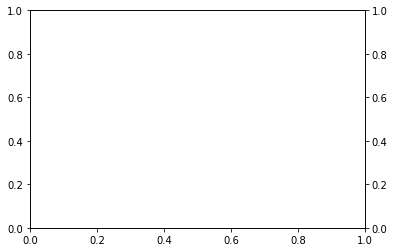

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 매번 epoch가 1번 돌아서 학습이 더딤, 학습 시간이 오래 걸림
# hist = model.fit(x_train, y_train, epochs=1000)
for i in range(500):
  print('current epoch: ', i)
  model.fit(x_train, y_train, epochs=1, batch_size = 1, shuffle= False)
  model.reset_states()

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 싱글 스텝 prediction
# x_train 50개의 smaple이 들어오니까 (50, 4, 1)
# 50개 한꺼번에 예측 각각 1개에서 생성된 히든값을 버리지 않고 다음 히든의 입력으로 넣어줌. 128개의 히든값이 안 버려짐 -> 그래서 루틴이 끝나면 리셋을 시켜야해줌.
results = model.predict(x_train, batch_size=1)
model.reset_states()
# 마지막 음표의 히든의 출력이 새로운 에프크에 들어감,
# print(results)

code_results = ['g8', 'e8', 'e4', 'f8']
for i in range(len(results)):
  index = np.argmax(results[i])
  code_results.append(idx2code[index])

print('code_results: ', code_results)
print('original: ', seq)

#multi step predictin
code_start = ['g8', 'e8', 'e4', 'f8']
code_in = [code2idx[i] / 13.0 for i in code_start]
# print(code_in)

#Dnn코드에서 shape만 바꿔주면 됨, 1개씩 들어오니 shape(1, 4 ,1)
for i in range(len(results)):
  code_in_array = np.array(code_in)
  # print(code_in_array)
  sample_in = np.reshape(code_in_array, (1, 4, 1)) #instance num, feature num
  results = model.predict(sample_in)
  index = np.argmax(results)
  code_start.append(idx2code[index])
  code_in.append(index / 13.0)
  code_in.pop(0) # 0번째 리스트를 빼버림
print('code_result2', code_start)

code_results:  ['g8', 'e8', 'e4', 'f8', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'e8', 'e8', 'e4', 'e4', 'd4', 'f8', 'd8', 'd4', 'e8', 'e8', 'e8', 'g8', 'e8', 'e8', 'f8', 'e4', 'd8', 'e4', 'd8', 'd8', 'd8', 'f8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
original:  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
code_result2 ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8'

In [ ]:
#mul